In [2]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
%matplotlib inline

import config

In [3]:
url_main = 'http://api.census.gov/data/2018/abscs'
url_columns = '?get=NAME,EMP,PAYANN'
url_focus = '&for=state:*'
url_key = config.key
full_url = f'{url_main}{url_columns}{url_focus}{url_key}'
response = requests.get(full_url)

In [4]:
annual_pay = pd.read_json(response.text)
annual_pay.columns = annual_pay.iloc[0]
annual_pay.drop(index=0, inplace=True)
annual_pay.head()

,NAME,EMP,PAYANN,state
1,Mississippi,920447,34137231,28
2,Missouri,2464500,116172182,29
3,Montana,361600,14060286,30
4,Nebraska,855009,38441262,31
5,Nevada,1240230,55634075,32


In [5]:
annual_pay.astype({'EMP':'int64'})
annual_pay['EMP'] = annual_pay['EMP'].astype(int)/100000
annual_pay['PAYANN'] = annual_pay['PAYANN'].astype(int)/100000

In [6]:
annual_pay.rename(columns={"NAME":"state_name","EMP":"employees","PAYANN":"annual_pay","state":"state_number"},inplace=True)
two_states = annual_pay[(annual_pay['state_name']=='Wisconsin')|(annual_pay['state_name']== 'Minnesota')]

Text(0, 0.5, 'State')

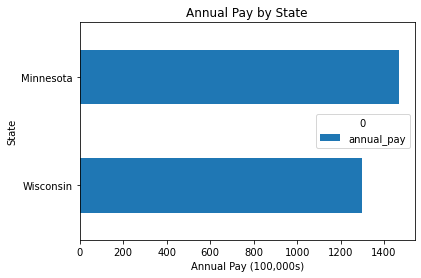

In [7]:
vis1 = two_states[['state_name','annual_pay']]
ax = vis1.plot(title='Annual Pay by State',kind='barh',x='state_name')
ax.set_xlabel('Annual Pay (100,000s)')
ax.set_ylabel('State')

Text(0, 0.5, 'Annual Pay (100,000s)')

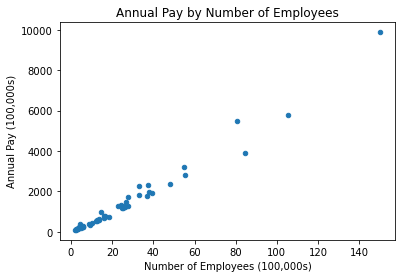

In [8]:
vis2 = annual_pay[['employees','annual_pay']]
ax = vis2.plot(title='Annual Pay by Number of Employees',kind='scatter',x='employees',y='annual_pay')
ax.set_xlabel('Number of Employees (100,000s)')
ax.set_ylabel('Annual Pay (100,000s)')